In [171]:
import svgutils.transform as sg

In [172]:
fig1 = sg.fromfile("assets/output.svg")

In [173]:
from cairosvg import svg2png


In [174]:
svg_code = fig1.to_str()

In [175]:
svg2png(bytestring=svg_code,write_to='output.png')

In [191]:
! convert assets/Japanese_Katakana_A.svg output.png

In [192]:
import json
training_examples = []
with open("a.txt", "r", encoding="utf-8") as f:
    for l in f:
        training_examples.append(json.loads(l))

In [193]:
svg_code

b'<?xml version=\'1.0\' encoding=\'ASCII\' standalone=\'yes\'?>\n<svg xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:svg="http://www.w3.org/2000/svg" xmlns="http://www.w3.org/2000/svg" xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd" xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape" width="500" height="500" viewBox="0 0 132.29167 132.29167" version="1.1" id="svg8" inkscape:version="0.92.4 (5da689c313, 2019-01-14)" sodipodi:docname="Japanese_Katakana_kyokashotai_A.svg">\n  <defs id="defs2"/>\n  <sodipodi:namedview id="base" pagecolor="#ffffff" bordercolor="#666666" borderopacity="1.0" inkscape:pageopacity="0.0" inkscape:pageshadow="2" inkscape:zoom="0.7" inkscape:cx="138.92404" inkscape:cy="310.39217" inkscape:document-units="mm" inkscape:current-layer="text20" showgrid="false" units="px" inkscape:window-width="1440" inkscape:window-height="837" inkscape:win

In [194]:
import cv2

In [195]:
image = cv2.imread("output.png")

In [196]:
objects = training_examples[0]['objects']
paths = [o for o in objects if o['type'] == 'path']

In [197]:
paths

[{'type': 'path',
  'originX': 'left',
  'originY': 'top',
  'left': 90.99000000000001,
  'top': 82.64999771118164,
  'width': 325.84,
  'height': 136.01,
  'fill': None,
  'stroke': 'red',
  'strokeWidth': 10,
  'strokeDashArray': None,
  'strokeLineCap': 'round',
  'strokeLineJoin': 'round',
  'strokeMiterLimit': 10,
  'scaleX': 1,
  'scaleY': 1,
  'angle': 0,
  'flipX': False,
  'flipY': False,
  'opacity': 1,
  'shadow': None,
  'visible': True,
  'clipTo': None,
  'backgroundColor': '',
  'fillRule': 'nonzero',
  'globalCompositeOperation': 'source-over',
  'transformMatrix': None,
  'skewX': 0,
  'skewY': 0,
  'pathOffset': {'x': 258.9092135623731, 'y': 155.65499771118164},
  'path': [['M', 95.99, 136.63999771118165],
   ['Q', 96, 136.64999771118164, 97.5, 137.14999771118164],
   ['Q', 99, 137.64999771118164, 99.5, 137.64999771118164],
   ['Q', 100, 137.64999771118164, 107, 137.14999771118164],
   ['Q', 114, 136.64999771118164, 125, 134.14999771118164],
   ['Q', 136, 131.64999771

In [198]:
from matplotlib import pyplot as plt


In [199]:
frame_no = 999
radius = 40


for p in range(len(paths)-1, -1, -1): # iterate over strokes
    path = paths[p]
    points = path['path']

    ctr = 0

    for i in range(len(points)-1, 0, -1):
        oldx = points[i-1][1]
        oldy = points[i-1][2]
        newx = points[i][1]
        newy = points[i][2]



        for r in np.arange(0, 1.01, 0.2):
            x_cen = oldx*(1-r) + newx*r
            y_cen = oldy*(1-r) + newy*r        

            for xx in range(-radius,radius):
                for yy in range(-radius, radius):
                    if xx*xx + yy*yy <= radius*radius:
                        x = int(np.round(x_cen + xx))
                        y = int(np.round(y_cen + yy))

                        if x < 0 or y < 0 or x > 499 or y > 499:
                            continue

                        if True or image[y][x][0] == 0:
                            image[y][x] = [255,255,255]

        cv2.imwrite(f"frame{frame_no:04d}.png", image)

        frame_no -= 1

In [200]:
! convert frame*png a.gif

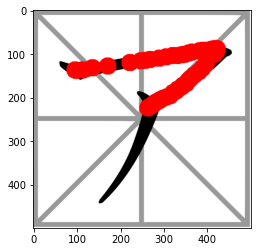

In [150]:
plt.imshow(image)
plt.show()

In [69]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]